## If a cell begins with DNC: do not change it and leave the markdown there so I can expect a basic level of  organization that is common to all HW (will help me with grading). This also clearly delineates the sections for me

## DNC: preamble leave any general comments here and, in keeping with good practice, I suggest you load all needed modules in the preamble

In [2]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

## DNC: Begin Part 1: Descriptive Statistics 

### Part 1: Problems for descriptive statistics 

#### 1-1: Understanding statistical calculations in python 

* Create a numpy array that has 10 uniform random numbers between 25.0 and 35.0, store it as a variable 
* Createa pandas dataframe with one frame based on your numpy array 
* Use "np.std" and "pd.std" formulas to calculate the standard deviation from both arrays, do not change any of the default arguments 
* The numbers should be different, explain why 
* Repeat the exercise with 1E6 uniform random numbers drawn from the same range 
* Comment on whether the numbers are different or not and explain why 
* Demonstrate that by using the proper function arguments you can obtain the same answer in both methods 


#### 1-2: Box plots 

* The data file GerberdingElectricityChilledWater.csv shows chilled water (energy) and electricity usage for Gerberding Hall over approximately an 18 month period from Jan 2013 to June 2014.  
* **Note: these are real data! If you make any executive decisions (e.g., remove some points for very specific reasons), clearly explain your decision and motivation for doing so** 

* Load the data into Python (your choice of method) and prepare a box plot summary of the data. 
* Present the plot in the nicest possible format (e.g., improve it from the default and prepare it for publication or presentation format) - this is open ended and you can use your judgement 
* Explain in your own words what each part on the box plot means

### Part 1: Problems for descriptive statistics

#### 1-1: Understanding statistical calculations in python

In [3]:
#Creating array of 10 uniform random numbers between 25 and 35
a=np.random.uniform(25,35,10)
#Loading array into a data frame
data1=pd.DataFrame(a)
#Printing Standard Deviation of array from both methods
print('Standard Deviation from np.std: %f' %np.std(a))
print('\nStandard Deviation from pd.DataFrame.std: %f' %pd.DataFrame.std(data1))

Standard Deviation from np.std: 2.418255

Standard Deviation from pd.DataFrame.std: 2.549064


The numbers are different because of different formulas.

**Formula for np.std: **  
The standard deviation of a population is defined by the following formula:  
`sqrt(sum(abs(x - x.mean())**2)/N)`

**Formula for pd.DataFrame.std: **  
The standard deviation of a sample is defined by slightly different formula:  
`sqrt(sum(abs(x - x.mean())**2)/(N-1))`

There is an (N-1) in pd.DataFrame.std and (N) in np.std.
This is because we lose a degree of freedom and causes the difference in the standard deviation values.

In [4]:
#Creating array of 1,000,000 uniform random numbers between 25 and 35
a=np.random.uniform(25,35,10**6)
#Loading array into a data frame
data2=pd.DataFrame(a)
#Printing Standard Deviation of array from both methods
print('Standard Deviation from np.std: %f' %np.std(a))
print('\nStandard Deviation from np.std: %f' %pd.DataFrame.std(data2))

Standard Deviation from np.std: 2.886980

Standard Deviation from np.std: 2.886981


Here, as we have a large number of elements in the array (10<sup>6</sup> elements), both the standard deviation values are approximately the same which can be seen above.

In [5]:
#Creating array of 10 uniform random numbers between 25 and 35
a=np.random.uniform(25,35,10)
#Loading array into a data frame
data3=pd.DataFrame(a)
#Getting same values of Standard Deviation by using proper function argument in np.std
print('Standard Deviation from np.std with ddof=1: %f' %np.std(a,ddof=1))
print('Standard Deviation from standard pd.DataFrame.std: %f' %pd.DataFrame.std(data3))
#Getting same values of Standard Deviation by using proper function argument in pd.DataFrame.std
print('\nStandard Deviation from standard np.std: %f' %np.std(a))
print('Standard Deviation from pd.DataFrame.std with ddof=0: %f' %pd.DataFrame.std(data3,ddof=0))

Standard Deviation from np.std with ddof=1: 2.561621
Standard Deviation from standard pd.DataFrame.std: 2.561621

Standard Deviation from standard np.std: 2.430167
Standard Deviation from pd.DataFrame.std with ddof=0: 2.430167


#### 1-2: Box plots

In [6]:
data4=pd.read_csv('GerberdingElectricityChilledWater.csv')
data4.set_index('DateTime');

After looking at the initial box plots of the data, it was clear that because of some outliers, it was difficult to get some meaningful information like interquartile range and mean from the data. Outliers in the Btu column include values as high as 2,000,000 and as low as -70 in the kWh column which is theoretically not possible. Hence, it was useful to exclude such values.

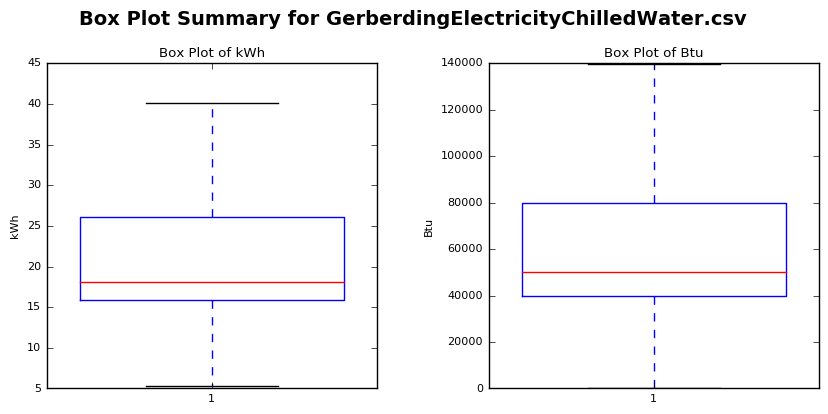

In [16]:
fig = plt.figure(figsize=(9,4.5))
fig.suptitle('Box Plot Summary for GerberdingElectricityChilledWater.csv', fontsize=14, fontweight='bold')
plt.rcParams.update({'font.size': 8})

axes = fig.add_subplot(121)
axes.boxplot(data4.kWh,widths=0.8, showfliers=False)
axes.set_ylabel('kWh')
axes.set_title('Box Plot of kWh')

axes = fig.add_subplot(122)
axes.boxplot(data4.Btu, widths=0.8, showfliers=False)
axes.set_ylabel('Btu')
axes.set_title('Box Plot of Btu')
plt.tight_layout(pad=4, w_pad=4)
plt.show()

* **Box plot of Kwh**  
 - The box plot of kWh has a mean of around 18 which is represented by the red line
 - Interquartile range (first quartile to third quartile) is from 16 to 26 which is represented by the rectangle.
* **Box plot of Btu**  
 - The box plot of Btu has a mean of around 50000 which is represented by the red line.
 - Interquartile range (first quartile to third quartile) is from 40000 to 60000 which is represented by the rectangle.

## DNC: Begin Part 2

### Part 2: Distributions 

* Your goal is to prepare a side-by-side plot describing the distribution of data from part 1 related to Gerberding Hall.

1) To complete the plot you should assume the data are normally distributed and determine the mean and standard deviation of the chilled water data series.  

2) The left panel of the plot should be a normalized histogram of the chilled water data with an **overlay** of the PDF of the normal distribution based on the $\bar x$ and $s$ values from the data series.  The right panel of the plot should be contain two lines corresponding to the measured CDF and CDF from the normal distribution estimated from the data. 

3) Repeat (2) for the electricity water 

4) Comment in a Markdown cell on the ability of a normal distribution to describe this data 


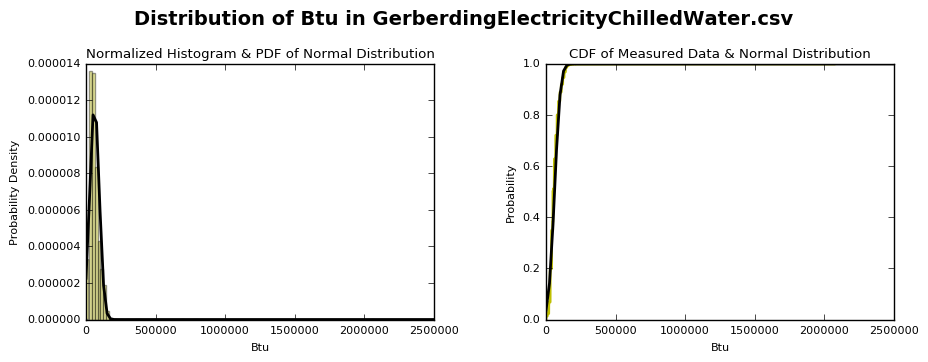

In [8]:
#Calculating mu and std for Btu
mu, std = norm.fit(data4.Btu)

#New figure
fig = plt.figure(figsize=(10,4))
fig.suptitle('Distribution of Btu in GerberdingElectricityChilledWater.csv', fontsize=14, fontweight='bold')

#Subplot 1
fig.add_subplot(121)
#Plot of Normalized Histogram (yellow color and 0.4 alpha value (0:transparent, 1:opaque))
plt.hist(data4.Btu,bins=100,normed=True,color='y',alpha=0.4)
#Calculating xmin and xmax from histogram plot for use in PDF of normal distribution
xmin = plt.xlim()[0]
xmax = plt.xlim()[1]
#Points at which PDF of normal distribution is calculated
x = np.linspace(xmin, xmax, 100)
#Calculating PDF of normal distribution
p = norm.pdf(x, mu, std)
#Plot of PDF of normal distribution
plt.plot(x, p,'k', linewidth=2)
#Setting x-label, y-label, and title
plt.xlabel('Btu')
plt.ylabel('Probability Density')
plt.title('Normalized Histogram & PDF of Normal Distribution')

#Subplot 2
fig.add_subplot(122)
#Sorting data by Btu
sorted_data = np.sort(data4.Btu)
#Plot of CDF of measured data
plt.plot(sorted_data, np.linspace(0,1,sorted_data.size),'y',linewidth=2)
#Calculating CDF of normal distribution
p = norm.cdf(x, mu, std)
#Plot of CDF of normal distribution
plt.plot(x, p,'k', linewidth=2)
#Setting x-label, y-label, and title
plt.xlabel('Btu')
plt.ylabel('Probability')
plt.title('CDF of Measured Data & Normal Distribution')

#Adjusting subplots to figure area
plt.tight_layout(pad=4, w_pad=4)

plt.show()

**Observations:**
* The PDF of the normal distribution closely follows the data of the histogram.
* The CDF of the normal distribution and that of the measured data closely overlap each other.

**Conclusion:**

It can be concluded that a normal distribution **can be used** to describe the data.

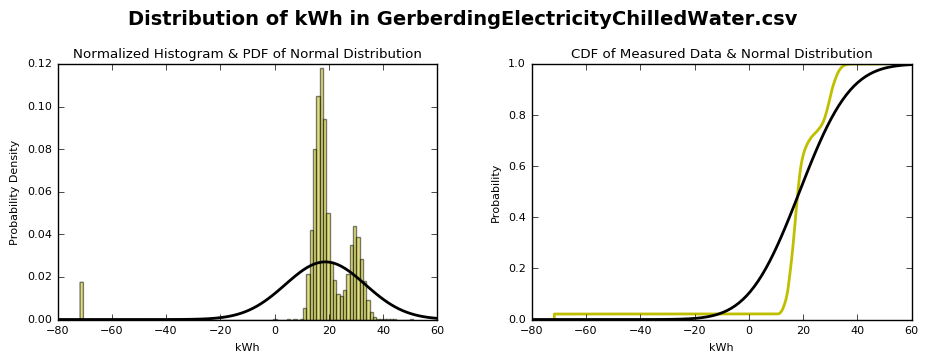

In [9]:
#Calculating mu and std for kWh
mu, std = norm.fit(data4.kWh)

#New figure
fig = plt.figure(figsize=(10,4))
fig.suptitle('Distribution of kWh in GerberdingElectricityChilledWater.csv', fontsize=14, fontweight='bold')

#Subplot 1
fig.add_subplot(121)
#Plot of Normalized Histogram (yellow color and 0.5 alpha value (0:transparent, 1:opaque))
plt.hist(data4.kWh,bins=100,normed=True,color='y',alpha=0.5)
#Calculating xmin and xmax from histogram plot for use in PDF of normal distribution
xmin = plt.xlim()[0]
xmax = plt.xlim()[1]
#Points at which PDF of normal distribution is calculated
x = np.linspace(xmin, xmax, 100)
#Calculating PDF of normal distribution
p = norm.pdf(x, mu, std)
#Plot of PDF of normal distribution
plt.plot(x, p, 'k', linewidth=2)
#Setting x-label, y-label, and title
plt.xlabel('kWh')
plt.ylabel('Probability Density')
plt.title('Normalized Histogram & PDF of Normal Distribution')

#Subplot 2
fig.add_subplot(122)
#Sorting data by kWh
sorted_data = np.sort(data4.kWh)
#Plot of CDF of measured data
plt.plot(sorted_data, np.linspace(0,1,sorted_data.size),'y',linewidth=2)
#Calculating CDF of normal distribution
p = norm.cdf(x, mu, std)
#Plot of CDF of normal distribution
plt.plot(x, p, 'k', linewidth=2)
#Setting x-label, y-label, and title
plt.xlabel('kWh')
plt.ylabel('Probability')
plt.title('CDF of Measured Data & Normal Distribution')

#Adjusting subplots to figure area
plt.tight_layout(pad=4, w_pad=4)

plt.show()

**Observations:**
* The PDF of the normal distribution does not follow the histogram. It can be seen that the histogram has 2 peaks but the normal distribution has only 1 peak.
* The CDF of the normal distribution and that of the measured data do not overlap each other.

**Conclusion:**

It can be concluded that the normal distribution **cannot be used** to describe the data.

## DNC: Begin Part 3

### Part 3: Hypothesis testing 

The file energyuse.csv contains energy use data for 6 UW students. The data include electricity for lighting, all other electricity use and total electricity use. The final entry in the data file is the national average of the same values. 

Please do the following

1) Formulate a statistical hypothesis to test about the three data sets and clearly state it  
2) Perform a test a significance level of P=0.05 (_make sure to clearly comment your work so I can follow what you are doing_)  
3) Clearly state the meaning of the results in plain language 

#### Import energyuse.csv in a Data Frame

In [10]:
data5=pd.read_csv('energyuse.csv')
data5

,Group,Lighting,Electricity,Total
0,A,0.451,1.270,1.721
1,B,1.033,1.769,2.801
2,C,0.410,1.629,2.040
3,D,0.708,1.633,2.341
4,E,2.317,0.725,3.042
5,F,1.601,0.634,2.235
6,National Avg,1.760,1.280,3.040


#### Hypothesis Testing on Lighting data
* **Null hypothesis:** UW Students have a mean energy consumption for lighting equal to the national average energy consumption for lighting (mu = 1.76).  
* **Alternate hypothesis:** UW Students do not have a mean energy consumption for lighting equal to the national average energy consumption for lighting (mu != 1.76).  
  
These hypotheses constitute a **two-tailed test**. The null hypothesis will be rejected if the sample mean is too big or too small. A **significance level of 0.05** is used. The test method used is a **one-sample t-test**.

In [11]:
[tcalc,p]=stats.ttest_1samp(data5.Lighting[:-1],data5['Lighting'].iloc[-1])
print('t-statistic = %f' %tcalc)
print('p-value = %f' %p)

t-statistic = -2.209342
p-value = 0.078169


As the p-value (0.078169) is **greater** than the significance level (0.05), we **cannot reject** the null hypothesis.

#### Hypothesis Testing on Electricity data
* **Null hypothesis:** UW Students have a mean energy consumption for electricity equal to the national average energy consumption for electricity (mu = 1.28).
* **Alternate hypothesis:** UW Students do not have a mean energy consumption for electricity equal to the national average energy consumption for electricity (mu != 1.28).

These hypotheses constitute a **two-tailed test**. The null hypothesis will be rejected if the sample mean is too big or too small. A **significance level of 0.05** is used. The test method used is a **one-sample t-test**.

In [12]:
[tcalc,p]=stats.ttest_1samp(data5.Electricity[:-1],data5['Electricity'].iloc[-1])
print('t-statistic = %f' %tcalc)
print('p-value =  %f' %p)

t-statistic = -0.016591
p-value =  0.987404


As the p-value (0.987404) is **greater** than the significance level (0.05), we **cannot reject** the null hypothesis.

#### Hypothesis Testing on Total data
* **Null hypothesis:** UW Students have a mean total energy (lighting and electricity) consumption as the national average total energy (lighting and electricity) consumption (mu = 3.04)
* **Alternate hypothesis:** UW Students do not have a mean total energy (lighting and electricity) consumption as the national average total energy (lighting and electricity) consumption (mu != 3.04)

These hypotheses constitute a **two-tailed test**. The null hypothesis will be rejected if the sample mean is too big or too small. A **significance level of 0.05** is used. The test method used is a **one-sample t-test**.

In [13]:
[tcalc,p]=stats.ttest_1samp(data5.Total[:-1],data5['Total'].iloc[-1])
print('t-statistic = %f' %tcalc)
print('p-value = %f' %p)

t-statistic = -3.402892
p-value = 0.019191


As the p-value (0.019191) is **lesser** than the significance level (0.05), we can **reject** the null hypothesis.